In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
x_train = np.array ([[4.7], [2.4], [7.4], [7.1], [4.3], [7.816],
                    [8.9], [5.2], [8.59], [2.1], [8],
                    [10], [4.5], [6], [4]],
                   dtype=np.float32)
y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]],
                   dtype=np.float32)

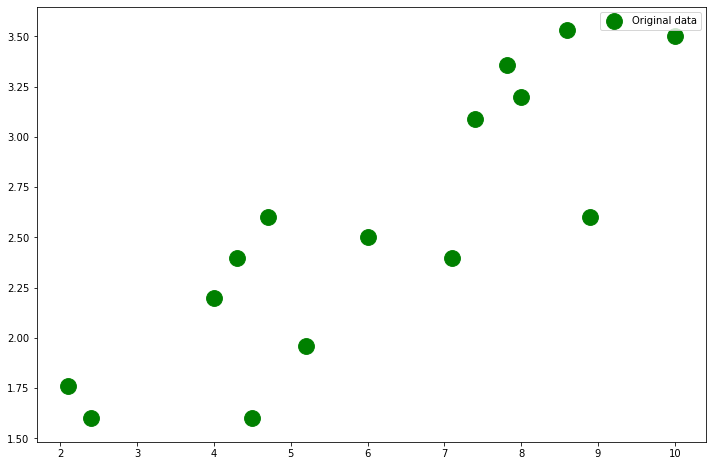

In [48]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [49]:
import torch

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

X_train.requires_grad, Y_train.requires_grad

(False, False)

In [50]:
input_size = 1
hidden_size = 1
output_size = 1

In [51]:
w1 = torch.rand(input_size,
               hidden_size,
               requires_grad=True)
w1.shape

torch.Size([1, 1])

In [52]:
w2 = torch.rand(hidden_size,
               output_size,
               requires_grad=True)
w2.shape

torch.Size([1, 1])

In [53]:
learning_rate = 1e-6

In [54]:
for iter in range(1, 10):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        # We are updating the weights here, so no grad is needed
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        # We zero the grad for the next pass so the grad does NOT accumlate from past calc
        w1.grad.zero_()
        w2.grad.zero_()

In [55]:
w1, w2

(tensor([[0.3895]], requires_grad=True),
 tensor([[0.5370]], requires_grad=True))

In [56]:
# Perform predictions

x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.4000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

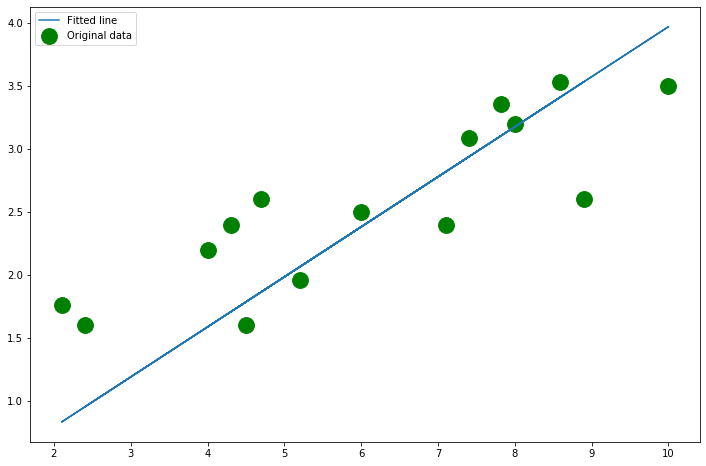

In [57]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')

plt.legend()
plt.show()

In [58]:
for iter in range(1, 100):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        # We are updating the weights here, so no grad is needed
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        # We zero the grad for the next pass so the grad does NOT accumlate from past calc
        w1.grad.zero_()
        w2.grad.zero_()

50 25.268918991088867


In [59]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.0314],
        [0.5267],
        [1.6239],
        [1.5581],
        [0.9436],
        [1.7152],
        [1.9531],
        [1.1411],
        [1.8851],
        [0.4608],
        [1.7556],
        [2.1945],
        [0.9875],
        [1.3167],
        [0.8778]], grad_fn=<MmBackward>)

In [60]:
predicted = predicted_in_tensor.detach().numpy()

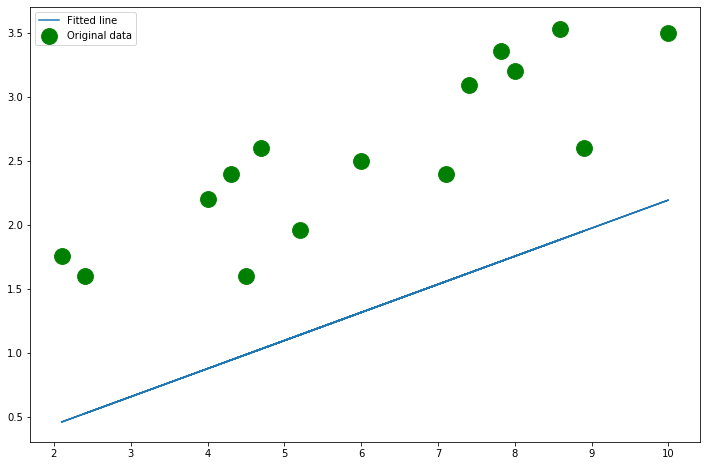

In [61]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')

plt.legend()
plt.show()

In [62]:
for iter in range(1, 10000):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        # We are updating the weights here, so no grad is needed
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        # We zero the grad for the next pass so the grad does NOT accumlate from past calc
        w1.grad.zero_()
        w2.grad.zero_()
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor


50 22.9639835357666
100 21.864015579223633
150 20.807538986206055
200 19.794673919677734
250 18.82535743713379
300 17.899375915527344
350 17.01634407043457
400 16.175729751586914
450 15.37685489654541
500 14.618937492370605
550 13.90107250213623
600 13.222247123718262
650 12.581384658813477
700 11.977295875549316
750 11.408747673034668
800 10.874459266662598
850 10.3731107711792
900 9.903339385986328
950 9.463775634765625
1000 9.053034782409668
1050 8.669743537902832
1100 8.312520027160645
1150 7.980013847351074
1200 7.670887470245361
1250 7.383836269378662
1300 7.117595195770264
1350 6.870917320251465
1400 6.642613887786865
1450 6.4315338134765625
1500 6.236574172973633
1550 6.0566864013671875
1600 5.890841484069824
1650 5.738093852996826
1700 5.597524166107178
1750 5.4682745933532715
1800 5.349521160125732
1850 5.240499019622803
1900 5.1404924392700195
1950 5.048811912536621
2000 4.9648213386535645
2050 4.887927055358887
2100 4.817577362060547
2150 4.753250598907471
2200 4.6944665908

tensor([[1.8662],
        [0.9529],
        [2.9382],
        [2.8191],
        [1.7073],
        [3.1034],
        [3.5338],
        [2.0647],
        [3.4107],
        [0.8338],
        [3.1764],
        [3.9705],
        [1.7867],
        [2.3823],
        [1.5882]], grad_fn=<MmBackward>)

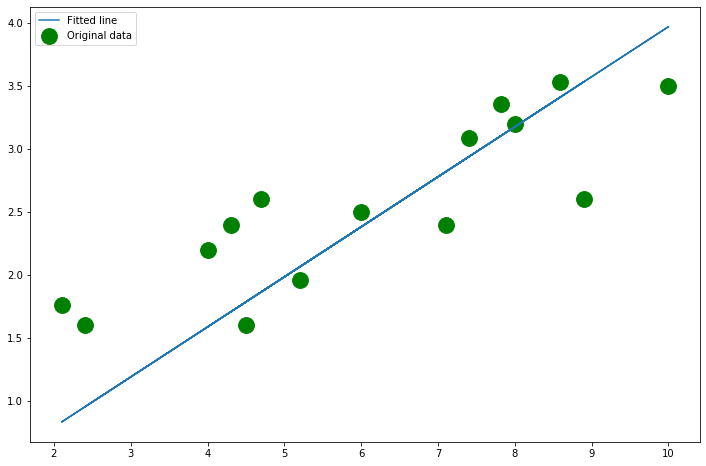

In [63]:
plt.figure(figsize=(12, 8))

predicted = predicted_in_tensor.detach().numpy()
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')

plt.legend()
plt.show()